In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
a = 11.666
sigma = 1.7


In [3]:
def ci1(X, eps, sigma):
    """
    for a with known sigma^2
    """
    mean = np.mean(X)
    tau = stats.norm.ppf( (1 + eps) / 2 )
    n = X.shape[0]
    return [ mean - tau * sigma / (n**0.5), mean + tau * sigma / (n**0.5) ]
    


def ci2(X, eps, a):
    """
    for sigma^2 with known a
    """
    n = X.shape[0]
    g2 = stats.chi2.ppf( (1 + eps) / 2, df=n)
    g1 = stats.chi2.ppf( (1 - eps) / 2, df=n)
    S_1_sq =  np.mean( (X - a) ** 2 )
    return [ n * S_1_sq / g2, n * S_1_sq / g1 ]


def ci3(X, eps):
    """
    for a with unknown sigma^2
    """
    n = X.shape[0]
    mean = np.mean(X)
    tau = stats.t.ppf( (1 + eps) / 2, df=n-1)
    S_0 = np.sqrt( np.mean((X -mean)**2) * (n / (n-1)) )
    return [ mean - tau * S_0 / (n**0.5), mean + tau * S_0 / (n**0.5) ]


def ci4(X, eps):
    """
    for sigma^2 with uknown a
    """
    n = X.shape[0]
    g2 = stats.chi2.ppf( (1 + eps) / 2, df=n-1)
    g1 = stats.chi2.ppf( (1 - eps) / 2, df=n-1)
    S_0_sq = np.mean((X -np.mean(X))**2) * (n / (n-1)) 
    return [ (n-1) * S_0_sq / g2, (n-1) * S_0_sq / g1 ]
    

In [4]:
def get_ci(X, eps):
    return ci2(X, eps, a)
    

In [5]:
def plot_len_vs_n(epsilons):
    for eps in epsilons:
        lengths = []
        sizes = range(7_000,25_000,10)
        for n in sizes:
            X = np.random.normal(a, sigma, n)
            l,r = get_ci(X, eps)
            lengths.append(r - l)
        plt.plot(sizes, lengths, label=f'eps={eps}')
    plt.legend(loc='upper right')
    plt.title(f"len_VS_size")
    plt.xlabel('sample size')
    plt.ylabel('CI len')
    # plt.savefig(f"./{dir}/fixed_eps/first.png")
    plt.show()
    plt.close()


def plot_len_vs_eps(sizes,title):
    for n in sizes:
        lengths = []
        epsilons = np.linspace(0.5, 0.98, 20, endpoint=True)
        for eps in epsilons:
            X = np.random.normal(a, sigma, n)
            l,r = get_ci(X, eps)
            lengths.append(r - l)
        plt.plot(epsilons, lengths, label=f'n={n}')
    plt.legend(loc='upper right')
    plt.title(f"len_VS_eps")
    plt.xlabel('eps')
    plt.ylabel('CI len')
    plt.show()
    # plt.savefig(f"./{dir}/fixed_n/{title}.png")
    plt.close()
    

In [6]:
def check_ci(N, size, eps):
    cnt = 0
    for _ in range(N):
        X = np.random.normal(a, sigma, size)
        l,r = get_ci(X, eps)
        cnt += (l <= sigma**2 <= r)
    return cnt / N
    

In [7]:
epsilons = [0.8, 0.9, 0.92, 0.95, 0.98]
sizes1 = [ 68, 100, 200, 300, 500, 700, 1000, 3000]
sizes2 = [5000, 7000, 10_000, 15_000, 20_000, 25_000]



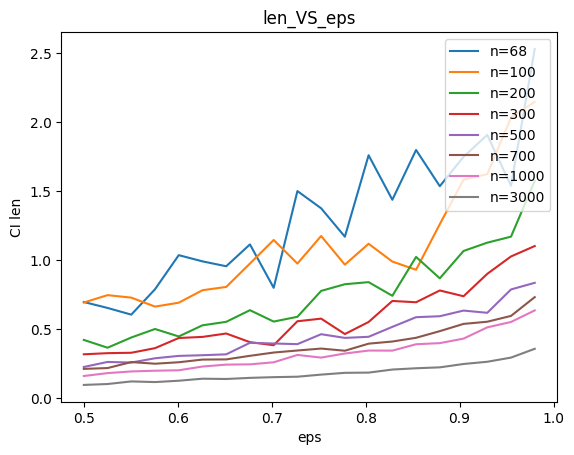

In [8]:
plot_len_vs_eps(sizes1, "small_n")
plot_len_vs_eps(sizes2, "big_n")
plot_len_vs_n(epsilons)

In [ ]:
epsilons = np.linspace(0.2, 0.97, 40, endpoint=True)

for N in [1000, 5000, 10000]:
    for size in [100, 500, 1000, 2000, 5000]:
        print(f"N={N} size={size}")
        probs = []
        for eps in epsilons:
            prob = check_ci(N, size, eps)
            probs.append(prob)
        plt.scatter(epsilons, probs, c='b')
        plt.plot([0,1], [0,1], c='r')
        plt.xlabel('theoretical eps')
        plt.ylabel('empirical eps')
        plt.title(f"N={N}_size={size}")
        plt.show()
        # plt.savefig(f"./pics/N={N}_size={size}.png")
        plt.close()